# Notebook d'exploration

## Mise en place et informations générales

Librairies et paramétrages utilisés au long de ce notebook

In [1]:
import numpy as np
import pandas as pd
from scipy import stats
import statsmodels.formula.api as smf
from sklearn.ensemble import RandomForestRegressor

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

In [2]:
%matplotlib inline
sns.set(style="white")
sns.set_palette("Set2")
mpl.rcParams['figure.dpi'] = 100

Chargement et aperçu du jeu de données précédemment nettoyé

In [3]:
data = pd.read_csv('data/cleaned_data.csv', index_col=0, low_memory=False)
data.head()

,monounsaturated_fat_100g,polyunsaturated_fat_100g,potassium_100g,pnns_groups_1,vitamin_a_100g,iron_100g,calcium_100g,cholesterol_100g,fiber_100g,saturated_fat_100g,...,sugars_100g,ingredients_from_palm_oil_n,additives_n,sodium_100g,salt_100g,proteins_100g,energy_100g,nutrition_score_fr_100g,nutrition_score_uk_100g,nutrition_grade_fr
code,,,,,,,,,,,,,,,,,,,,,
2000000017811,NaN,NaN,NaN,beverages,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2000000036036,NaN,NaN,NaN,fish-meat-eggs,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20234041,NaN,NaN,NaN,fat-and-sauces,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4101233893714,NaN,NaN,NaN,cereals-and-potatoes,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8718906174153,NaN,NaN,NaN,beverages,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Informations sur le type et le nombre de valeurs manquantes de chaque variable

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 281685 entries, 2000000017811 to 0044000032586
Data columns (total 22 columns):
monounsaturated_fat_100g       20844 non-null float64
polyunsaturated_fat_100g       21141 non-null float64
potassium_100g                 23063 non-null float64
pnns_groups_1                  68889 non-null object
vitamin_a_100g                 125609 non-null float64
iron_100g                      135820 non-null float64
calcium_100g                   131244 non-null float64
cholesterol_100g               126931 non-null float64
fiber_100g                     192854 non-null float64
saturated_fat_100g             220872 non-null float64
carbohydrates_100g             243584 non-null float64
fat_100g                       238124 non-null float64
sugars_100g                    236389 non-null float64
ingredients_from_palm_oil_n    248939 non-null float64
additives_n                    248939 non-null float64
sodium_100g                    242339 non-null float64


Pour le sous-ensemble des variables numériques, affichons un récapitulatif de leurs statistiques sommaires

In [5]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
monounsaturated_fat_100g,20844.0,5.939331,7.338939,0.0,0.000000,3.33000,8.650000,32.000000
polyunsaturated_fat_100g,21141.0,3.789167,4.753597,0.0,0.000000,1.79000,5.560000,21.400000
potassium_100g,23063.0,0.221747,0.182178,0.0,0.100000,0.16900,0.291000,0.808000
vitamin_a_100g,125609.0,0.000049,0.000082,0.0,0.000000,0.00000,0.000074,0.000321
iron_100g,135820.0,0.001366,0.001532,0.0,0.000000,0.00091,0.002250,0.007200
calcium_100g,131244.0,0.053006,0.065927,0.0,0.000000,0.02900,0.087000,0.318000
cholesterol_100g,126931.0,0.007309,0.014391,0.0,0.000000,0.00000,0.007000,0.060000
fiber_100g,192854.0,2.173124,2.607580,0.0,0.000000,1.40000,3.400000,10.800000
saturated_fat_100g,220872.0,4.109750,5.391638,0.0,0.000000,1.67000,6.670000,21.400000
carbohydrates_100g,243584.0,32.060221,29.146632,0.0,6.000000,20.60000,58.330000,139.000000


Pour ce même sous-ensemble de variables, affichons sous forme d'histogramme la distribution des valeurs présentes.

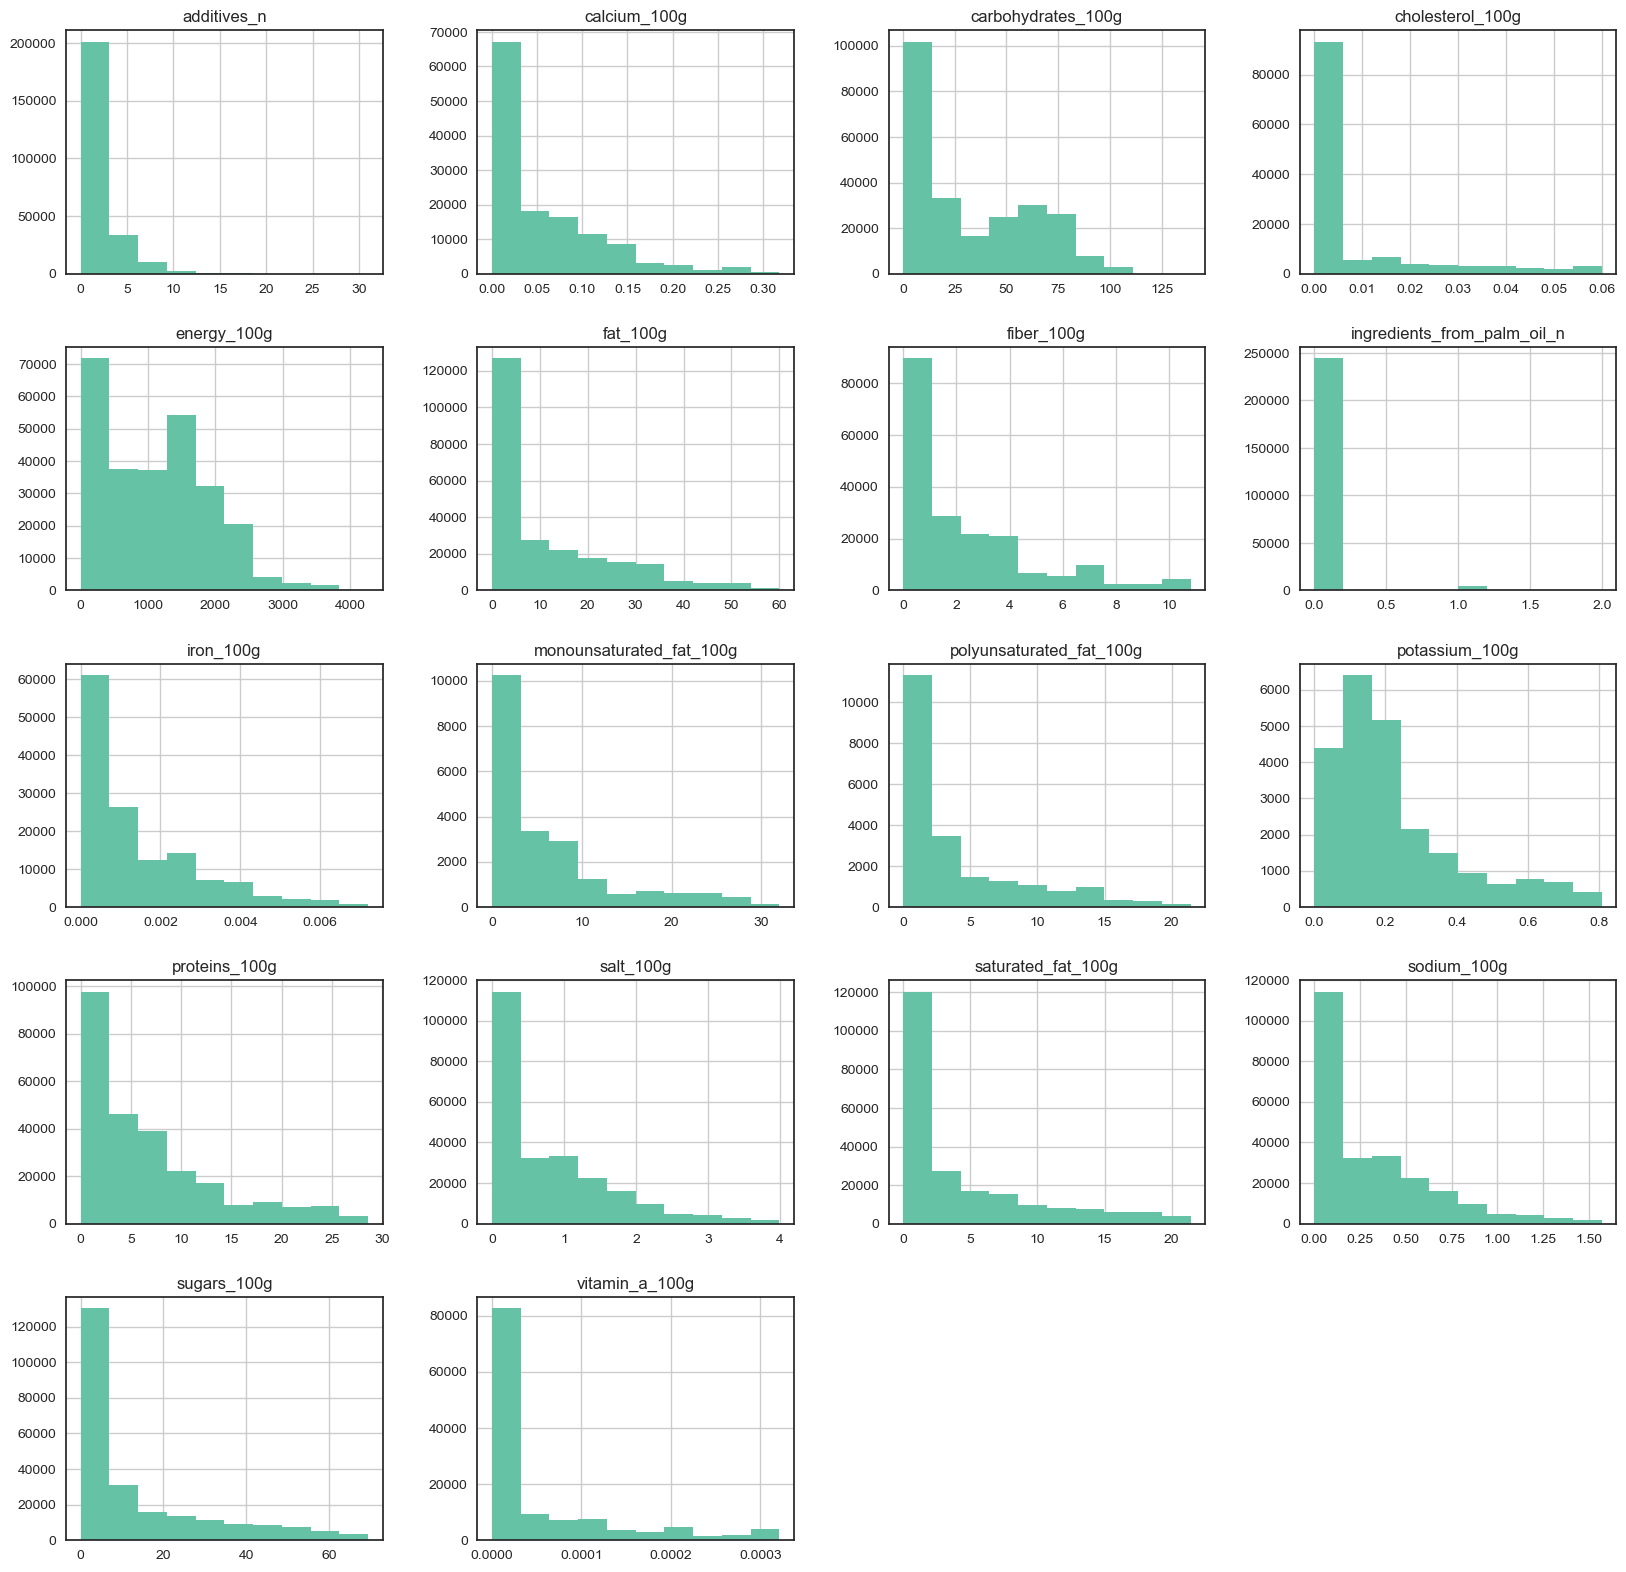

In [6]:
num_variables = data.select_dtypes(include=[np.number]).columns[:-2]

data.loc[:, num_variables].hist(figsize=(20, 20));

Maintenant, pour les variables catégorielles, visualisons la proportion de chacune de leur modalités.

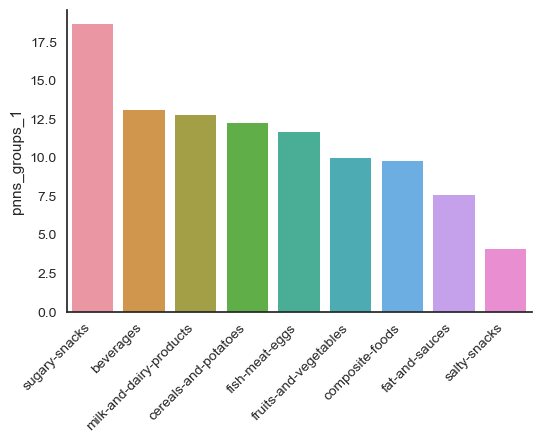

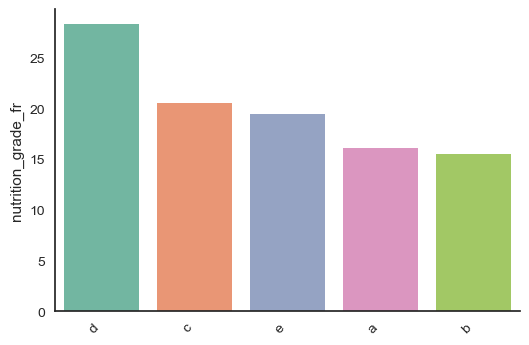

In [7]:
for col in data.select_dtypes(exclude=[np.number]).columns:
    plt.figure()
    tmp = data[col].value_counts() / len(data[col].dropna()) * 100
    g = sns.barplot(x=tmp.index.tolist(), y=tmp)
    for item in g.get_xticklabels():
        item.set_rotation(45)
        item.set_horizontalalignment('right')
    sns.despine()

## Étude du groupe de variables cibles

Observons la relation entre le score nutritionnel français et anglais, et leurs distributions respectives.

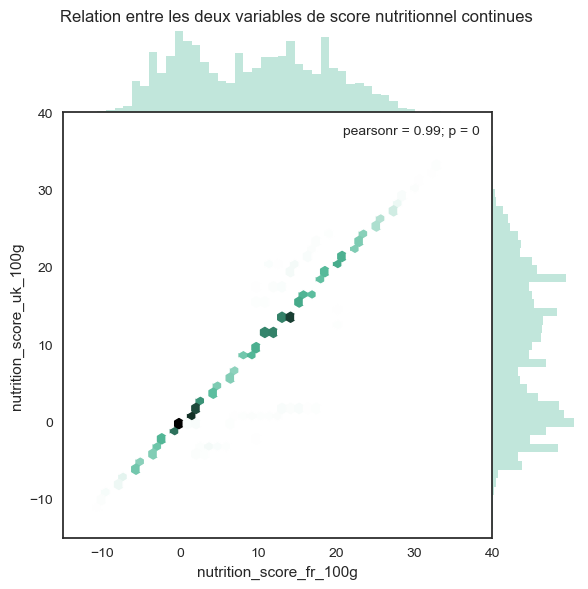

In [8]:
g = sns.jointplot(x="nutrition_score_fr_100g", y="nutrition_score_uk_100g", data=data, kind='hex', space=0, size=6)

plt.subplots_adjust(top=0.95)
g.fig.suptitle("Relation entre les deux variables de score nutritionnel continues", size=12);

Compte tenu de la relation linéaire quasi-parfaite, on en déduit que garder les deux est redondant. Nous ne conserverons donc que `nutrition-score-fr_100g`. 

Analysons maintenant la répartition de cette même variable par rapport à `nutrition_grade_fr`.

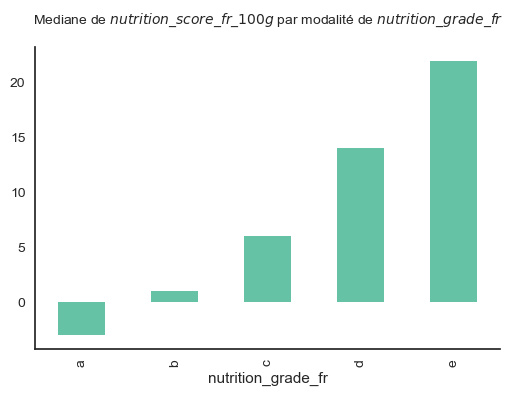

In [9]:
g = data.groupby('nutrition_grade_fr')['nutrition_score_fr_100g'].median().plot(kind='bar')

g.set_title('Mediane de $nutrition\_score\_fr\_100g$ par modalité de $nutrition\_grade\_fr$\n', fontsize=10)
sns.despine()

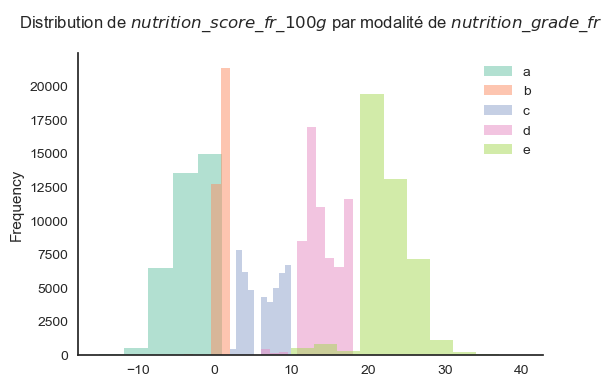

In [10]:
(data.groupby('nutrition_grade_fr')['nutrition_score_fr_100g']
 .plot(kind='hist',alpha=0.5, legend=True, 
       title='Distribution de $nutrition\_score\_fr\_100g$ par modalité de $nutrition\_grade\_fr$\n')
)

sns.despine()

Bien que pour chaque sous-groupe correspondant à une modalité de `nutrition_grade_fr` la médiane de la variable `nutrition_score_fr_100g` soit différente, les notations discrètes et les notes continues ne sont pas totalement étanches entre elles comme le montre l'histogramme ci-dessous. Nous ne conservons donc que `nutrition-score_fr_100g`, qui à elle seule apporte plus de précision.

In [11]:
data.drop(["nutrition_score_uk_100g", "nutrition_grade_fr"], axis=1, inplace=True)

## Étude des interactions entre variables

### Entre variable catégorielle et variable cible

Dans un premier temps, nous allons séparer les valeurs de la variable cible en fonction de la modalité à laquelle elle appartient dans la variable *pnns_groups_1*. Pour chacun de ces sous-échantillons, nous affichons leur moyenne et écart-type. 

In [12]:
samples = []
modalities = data['pnns_groups_1'].dropna().unique().tolist()

print(f"{'Modalité':{29}} {'μ':{8}} {'σ':{8}}\n{'-'*43}")

for modality in modalities:
    sample = (data.loc[data['pnns_groups_1']==modality, 'nutrition_score_fr_100g']
              .dropna().tolist())
    print(f"{modality:{24}} {np.mean(sample):{8}.{4}} {np.std(sample, ddof=1):{8}.{4}}")
    samples.append(sample)

Modalité                      μ        σ       
-------------------------------------------
beverages                   7.843    6.783
fish-meat-eggs              9.473    8.414
fat-and-sauces              12.15    6.746
cereals-and-potatoes        1.442    7.004
fruits-and-vegetables      -2.804    4.958
milk-and-dairy-products     8.115    6.815
composite-foods             3.423     5.73
sugary-snacks               17.79    6.715
salty-snacks                12.82      6.0


Nous utilisons maintenant l'analyse de variance à un facteur pour savoir s'il y a une relation significative entre les modalités de notre variable catégorielle et notre variable cible.

In [13]:
stats.f_oneway(*samples)

F_onewayResult(statistic=5486.9827565644855, pvalue=0.0)

Notre statistique F et _p-value_ pretent à croire que les facteurs de la variable catégorielle ont un effet sur la variable à expliquer. Affichons les distributions de variable cible par rapport à chaque modalité pour voir si cette différence se valide de manière pratique

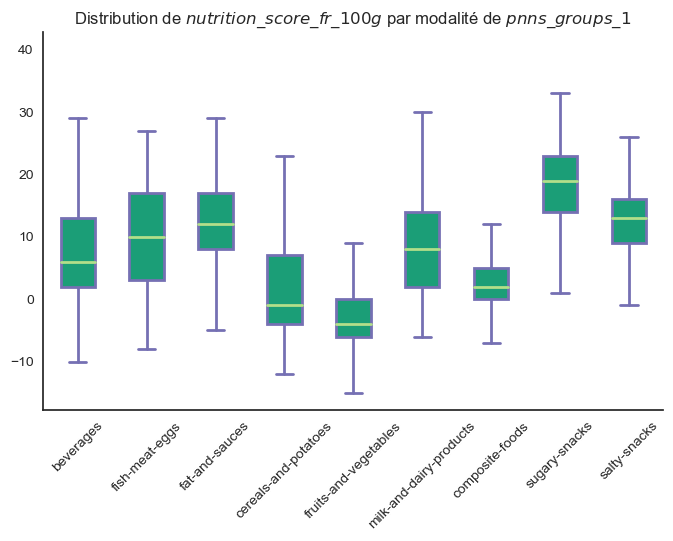

In [14]:
fig, ax = plt.subplots(1, 1, figsize=(8, 5))
bp = ax.boxplot(samples, patch_artist=True)

for box in bp['boxes']:
    box.set(color='#7570b3', linewidth=2)
    box.set(facecolor = '#1b9e77' )

for whisker in bp['whiskers']:
    whisker.set(color='#7570b3', linewidth=2)

for cap in bp['caps']:
    cap.set(color='#7570b3', linewidth=2)

for median in bp['medians']:
    median.set(color='#b2df8a', linewidth=2)

for flier in bp['fliers']:
    flier.set(marker='o', color='#e7298a', alpha=0.5)
    
ax.set_xticklabels(modalities, rotation=45);
ax.set_title(r"Distribution de $nutrition\_score\_fr\_100g$ par modalité de $pnns\_groups\_1$ ")
sns.despine();

- Quand bien même test statistique montre qu'il y a une différence significative, nous remarquons de manière pratique avec des boxplots que les distributions ne permettent pas d'en venir à la même conclusion. 

- De plus, pour les modélisations statistiques à venir, remplacer les valeurs manquantes de cette variable par le mode (*sugary_snacks*) induirait un grand biais dans la distribution de la variable (cf. histogramme de distribution), ce qui fausserait les résultats.

- Nous décidons donc de supprimer cette variable

### Entre attributs numériques

Afin de mieux la relation entre les variables numériques, elles-mêmes, affichons une matrice de corrélation (du coefficient de Pearson) entre les attributs numériques, afin de voir si des relations notables se dégagent.

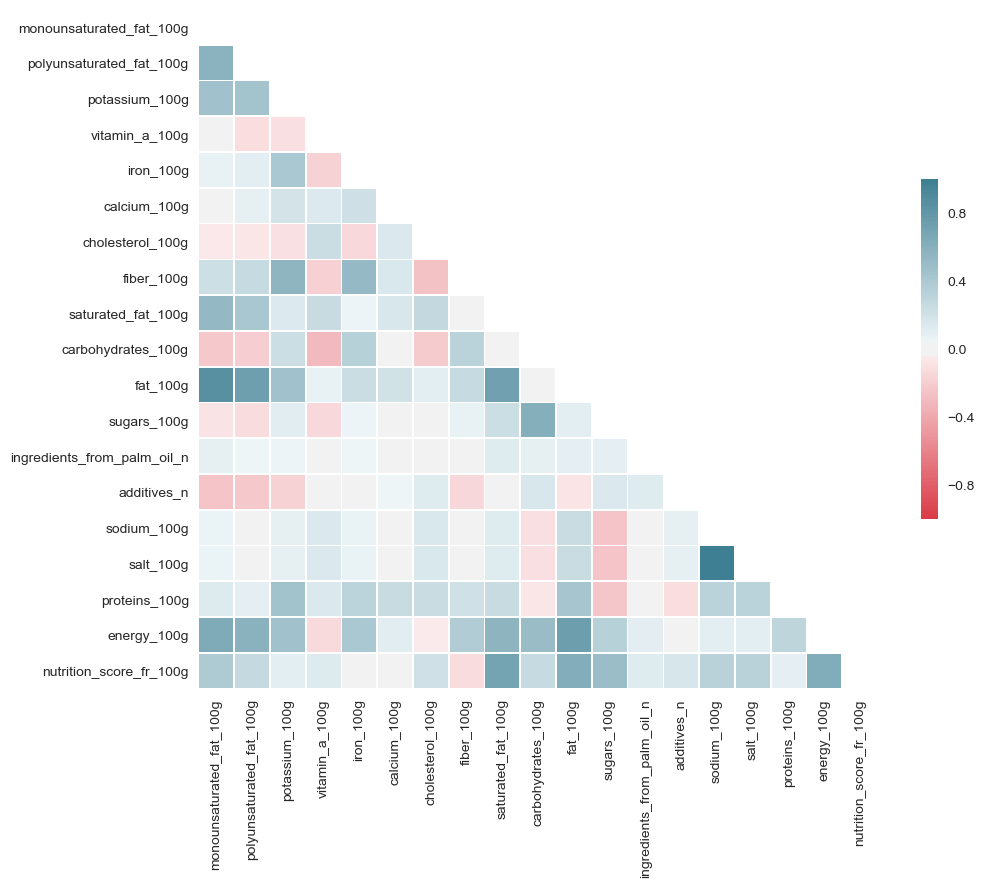

In [15]:
corr = data.corr()

# Masque pour cacher le triangle supérieur de la matrice
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(10, 220, as_cmap=True)

# Dessiner la matrice
g = sns.heatmap(corr, mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0,
                square=True, linewidths=.5, cbar_kws={"shrink": .5});

D'emblée, on remarque une très forte corrélation - quasi parfaite - entre `salt_100g` et `sodium_100g`. On choisit de ne conserver que cette dernière.

Aussi, analysons les relations entre les variables de type `fat` deux à deux qui semblent assez corrélées entre elles.

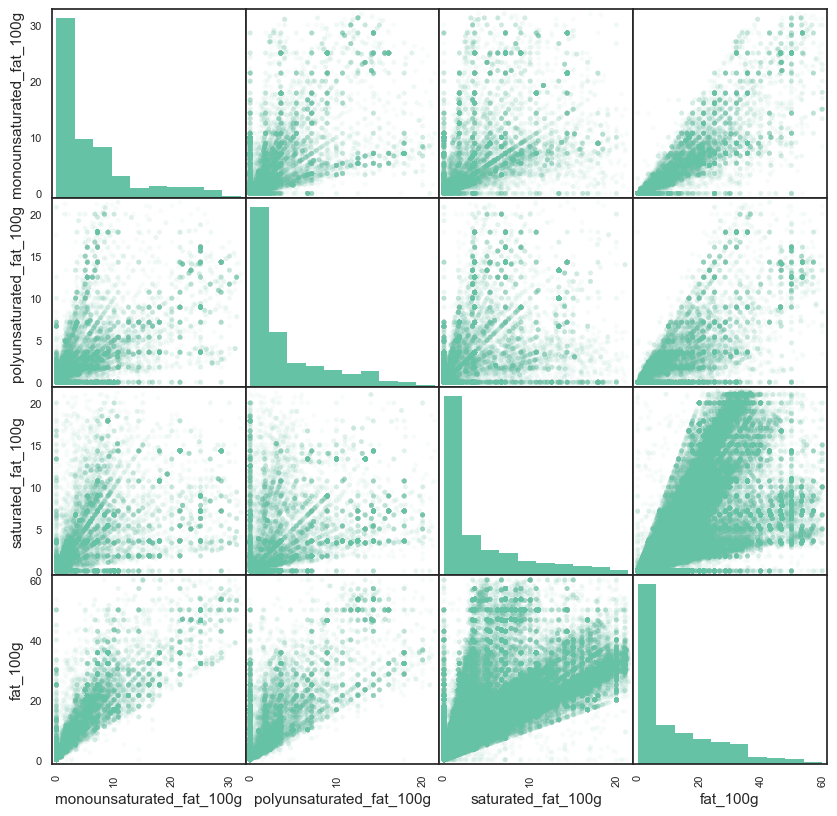

In [16]:
scatter_matrix(data[['monounsaturated_fat_100g', 'polyunsaturated_fat_100g', 'saturated_fat_100g', 'fat_100g']], 
               alpha=0.05, figsize=(10, 10));

Étant donné que `monounsaturated_fat_100g` et `monounsaturated_fat_100g` semblent être assez linéairement corrélées avec `fat_100g`, nous choisissons de supprimer ces premières.

Maintenant, analysons les variables qui ne sont que pauvrement correlées avec la variable cible.

In [17]:
corr_target = corr['nutrition_score_fr_100g'].between(-0.1, 0.1)
corr_target

monounsaturated_fat_100g       False
polyunsaturated_fat_100g       False
potassium_100g                 False
vitamin_a_100g                 False
iron_100g                       True
calcium_100g                    True
cholesterol_100g               False
fiber_100g                     False
saturated_fat_100g             False
carbohydrates_100g             False
fat_100g                       False
sugars_100g                    False
ingredients_from_palm_oil_n    False
additives_n                    False
sodium_100g                    False
salt_100g                      False
proteins_100g                   True
energy_100g                    False
nutrition_score_fr_100g        False
Name: nutrition_score_fr_100g, dtype: bool

Regardons de plus près à l'aide d'une représentation graphique pour voir si, en dépit du pauvre score de corrélation linéaire, il existe une quelconque autre relation.

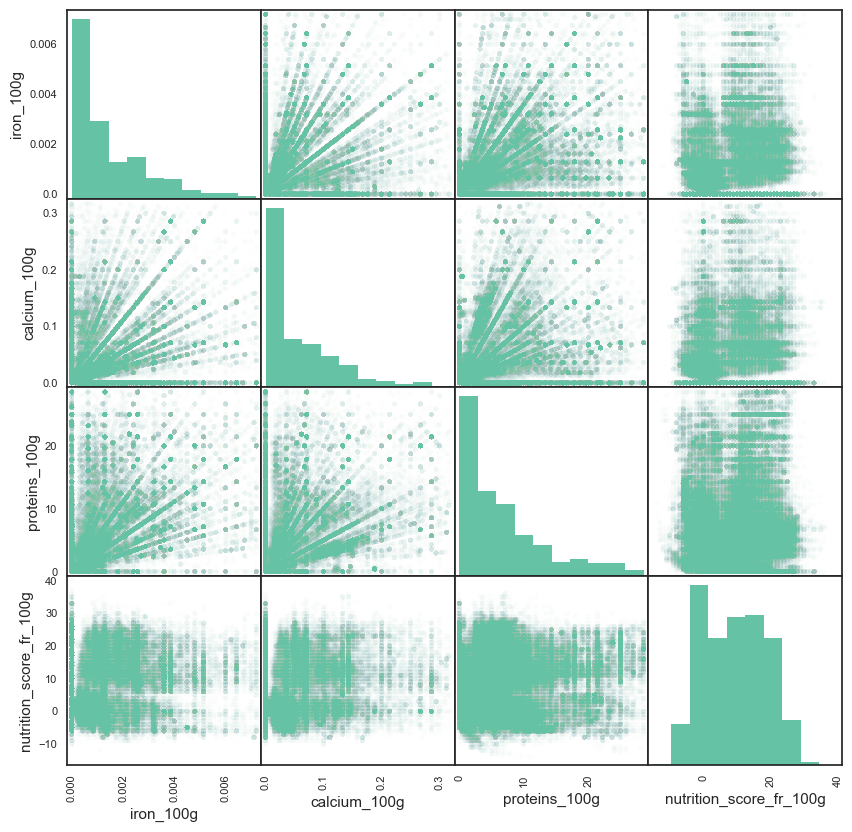

In [18]:
scatter_matrix(data[corr_target[corr_target].index.tolist() + ['nutrition_score_fr_100g']], 
               alpha=0.01, figsize=(10, 10));

Le nuage de points sur la dernière ligne de cette matrice graphique indique qu'il n'y a aucune relation — même non linéaire — entre ces variables indépendantes et la variable cible. Nous décidons donc de les supprimer aussi.

In [19]:
data_eng = data.drop(['monounsaturated_fat_100g', 'polyunsaturated_fat_100g', 'sodium_100g'] +
                     ['pnns_groups_1'] + corr_target[corr_target].index.tolist(), 
                     axis=1)

## Importance des variables

Préparons nos données afin qu'elles soient plus tard utilisables par des modèles, afin de continuer notre exploration de données mais cette fois-ci non par univariée ou bivariée, mais multivariée

Pour ce faire, nous ne gardons que les instances qui n'ont pas de valeur manquante dans la variable cible. Puis, nous imputons les valeurs manquantes dans les variables explicatives par leur moyenne respective.

In [20]:
design_matrix = data_eng.loc[data_eng['nutrition_score_fr_100g'].notnull(), :]
design_matrix = design_matrix.fillna(design_matrix.mean(axis=0))
design_matrix.info()

<class 'pandas.core.frame.DataFrame'>
Index: 221210 entries, 3175681847569 to 0044000032586
Data columns (total 13 columns):
potassium_100g                 221210 non-null float64
vitamin_a_100g                 221210 non-null float64
cholesterol_100g               221210 non-null float64
fiber_100g                     221210 non-null float64
saturated_fat_100g             221210 non-null float64
carbohydrates_100g             221210 non-null float64
fat_100g                       221210 non-null float64
sugars_100g                    221210 non-null float64
ingredients_from_palm_oil_n    221210 non-null float64
additives_n                    221210 non-null float64
salt_100g                      221210 non-null float64
energy_100g                    221210 non-null float64
nutrition_score_fr_100g        221210 non-null float64
dtypes: float64(13)
memory usage: 23.6+ MB


Nous séparons ensuite les variables explicative et la variable cible en deux objets distincts pour faciliter le traitement

In [21]:
X = design_matrix.iloc[:,0:-1]
y = design_matrix.iloc[:,-1]

### Regression Linéaire

Nous entrainons nos données sur un modèle de regression linéaire afin d'inférer l'importance des variables dépendantes que l'on a sélectionné au cours de nos processus de nettoyage et d'exploration pour expliquer notre variable cible 

In [22]:
formula =  y.name + " ~ " + " + ".join(X.columns.tolist())
model = smf.ols(formula, data=design_matrix)
result = model.fit()

print(result.summary(title="Résultats de la régression linéaire"))

                        Résultats de la régression linéaire                        
Dep. Variable:     nutrition_score_fr_100g   R-squared:                       0.818
Model:                                 OLS   Adj. R-squared:                  0.818
Method:                      Least Squares   F-statistic:                 8.258e+04
Date:                     Mon, 05 Mar 2018   Prob (F-statistic):               0.00
Time:                             22:25:30   Log-Likelihood:            -6.1315e+05
No. Observations:                   221210   AIC:                         1.226e+06
Df Residuals:                       221197   BIC:                         1.226e+06
Df Model:                               12                                         
Covariance Type:                 nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

Nous ne nous intéressons qu'à la colonne des _p-values_ attachées aux coefficients, qui nous informe coefficients sont significatifs excepté celui attaché à _potassium_100g_. Selon le modèle, chacune des autres variables joue un rôle dans la prédiction de la variable cible, tout en prenant en compte l'information apportée par les autres variables.

### Random Forest

Ensuite, nous entrainons ces mêmes données sur un modèle de Fôret Aléatoire

In [23]:
rf = RandomForestRegressor(n_jobs=-1, verbose=1)
rf.fit(X, y)

[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    1.6s remaining:    1.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    2.6s finished


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

De ce modèle entrainé, nous récupérons les informations sur importance des variables

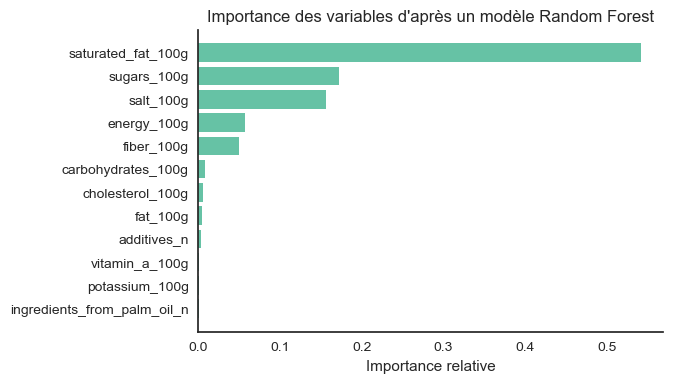

In [24]:
names = data_eng.columns.values

# Recupérer les valeurs d'importance dans le modèle entrainé
importance = rf.feature_importances_
sorted_importances = np.argsort(importance)

# Generer le plot
padding = np.arange(len(names)-1) + 0.5
plt.barh(padding, importance[sorted_importances], align='center')
plt.yticks(padding, names[sorted_importances])
plt.xlabel("Importance relative")
plt.title("Importance des variables d'après un modèle Random Forest")

sns.despine()

Selon ce modèle, un groupe de variable se détache du reste:
- *saturated_fat_100g*
- *sugars_100g*
- *salt_100g*
- *energy_100g*
- *fiber_100g*

## Pistes de modélisation

L'importance que le modèle de Forêt Aléatoire apporte aux variables est cohérent avec la formule utilisée pour calculer le score nutritionnel. Cependant, il existe plusieurs limitations à nos analyses qui ont conduit à ce résultat.

Notamment, durant notre analyse statistique, nous nous sommes limités au coefficient de corrélation linéaire pour étudier la relation des variables deux à deux. Aussi, la significativité statistique tests statistiques que nous avons effectués est biaisée du fait de la grande taille de "l'échantillon" de nos données, ce qui biaise ces tests et a une forte tendance à tous les rendre statistique. Enfin, compte tenu du fait que nous n'ayons pas de méthodologie de partition du jeu de données accompagnée d'une fonction de score, nous n'avons pas d'idée précise du pouvoir prédictif du sous-ensemble de variables explicatives retenues envers le score nutritionnel.

Pour remédier à ces limitations, plusieurs démarches peuvent être prises durant la phase de modélisation. Avant tout, au niveau de l'imputation des valeurs manquantes. Au cours de la dernière partie de ce notebook, nous avons fait le choix de les imputer par la moyenne par simplicité. Il est aussi possible de le faire par la médiane, ou le mode dans le cas de variables à valeurs discrètes. Nous pouvons aussi utiliser des procédés plus complexes, telle que la prédiction de valeurs manquantes d'une variable par régression en utilisant les autres variables explicatives disponibles. Semblable, la méthode des plus proches voisins permettra d'imputer des valeurs manquantes dans certaines variables en fonction des individus qui ont des caractéristiques plus proches dans les variables à valeurs présentes. 

Tous les modèles d'apprentissage supervisés de régression sont exploitables, avec les pré-traitement nécessaires selon celui qu'on utilise. On pense aux modèles précédemment utilisés dans ce notebook tels que la régression linéaire, ou une variante, le _stepwise regression_ qui permet de sélectionner les variables les plus utilises lui-même. D'autres méthodes de modèles tels que ceux par construction d'arbre de décision sont aussi possible, comme la Fôret Aléatoire précédemment mentionnée. Ces méthodes ont l'avantage d'être interprétables, dans le sens où on a les moyens d'avoir une indée de l'influence des variables explicatives sur la prédiction. D'autres méthodes plus opaques, tels que les réseaux de neurones, sont aussi possibles, au sacrifice de cette interprétabilité, mais avec des possibles gains de performances.
Afin de construire le modèle le plus utile, et si le modèle s'y prête, l'utilisation de méthodes de validation croisée lors de l'entrainement et de l'évaluation du modèle permettra de s'assurer d'optimiser les hyperparamètres, et constuire, *in fine*, le modèle le plus utile. 